# Practica 6

## Naive Bayes

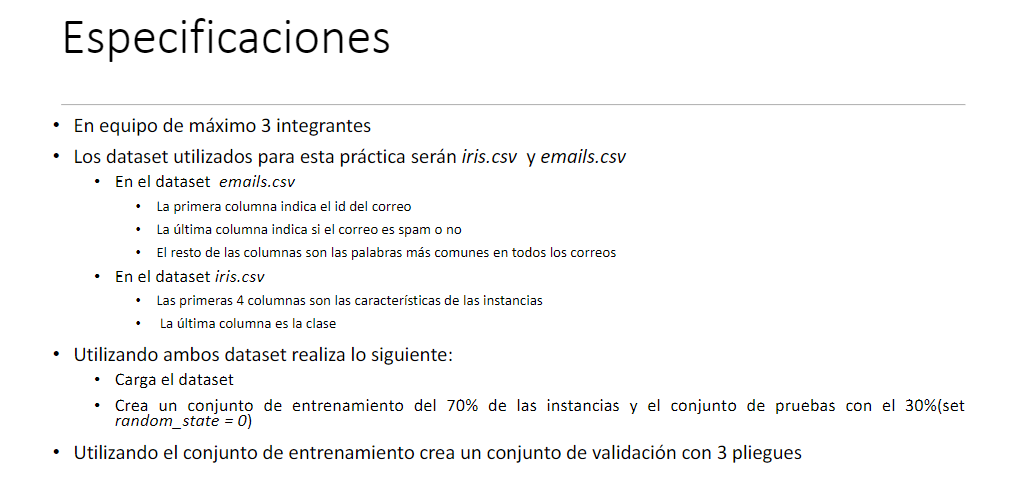

In [1]:
#Importamos las librerias necesarias

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
from  sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

In [3]:
#Entrenamiento de los datos  basado en 80% entrenamiento y 20 % prueba , asi como una validacion en 10 pliegues
#Definicion de Clases para email

class validation_set_email:
    def __init__(self, X_train_E, y_train_E, X_test_E, y_test_E):
        self.X_train_E = X_train_E
        self.y_train_E = y_train_E
        self.X_test_E = X_test_E
        self.y_test_E = y_test_E

class test_set_email:
    def __init__(self, X_test_E, y_test_E):
        self.X_test_E = X_test_E
        self.y_test_E = y_test_E

class data_set_email:
    def __init__(self, validation_set_email, test_set_email):
        self.validation_set_email = validation_set_email
        self.test_set_email = test_set_email
        
class validation_set_iris:
    def __init__(self,X_train_i,y_train_i,X_test_i,y_test_i):
        self.X_train_i = X_train_i
        self.y_train_i = y_train_i
        self.X_test_i = X_test_i
        self.y_test_i = y_test_i

class test_set_iris:
    def __init__(self,X_test_i,y_test_i):
        self.X_test_i = X_test_i
        self.y_test_i = y_test_i

class data_set_iris:
    def __init__(self,validation_set_iris,test_set_iris):
        self.validation_set_iris = validation_set_iris
        self.test_set_iris = test_set_iris

In [6]:
pd.options.display.max_colwidth = 200
dfEmails = pd.read_csv("C:/Users/Angel/Downloads/emails.csv", sep=',', engine='python') #Cargamos el data set 
dfiris =  pd.read_csv("C:/Users/Angel/Downloads/iris.csv",sep = ',',engine = 'python' )#Cargamos el segundo dataset 

XEmails = dfEmails.drop(columns=['Email No.','Prediction'],axis = 1).values
YEmails = dfEmails['Prediction'].values

Xiris = dfiris.drop(columns=['species'],axis = 1).values
Yiris = dfiris['species'].values

X_train_E,X_test_E,y_train_E,y_test_E = train_test_split(XEmails, YEmails, test_size=0.3, shuffle = False,random_state=0)
X_train_i,X_test_i,y_train_i,y_test_i = train_test_split(Xiris, Yiris, test_size=0.3, shuffle = False,random_state=0)


In [9]:
#Conjunto de Validacion en capaz 3 pliegues Emails
validation_sets_Email = []
kf1 = KFold(n_splits=3) #Modificar Parametro para obtener los demas pliegues
c1=0 
for train_index_E, test_index_E in kf1.split(X_train_E):
    c1=c1+1
    X_train_VE, X_test_VE = X_train_E[train_index_E], X_train_E[test_index_E]
    y_train_VE, y_test_VE = y_train_E[train_index_E], y_train_E[test_index_E]
    validation_sets_Email.append(validation_set_email(X_train_VE, y_train_VE, X_test_VE, y_test_VE))   
my_test_setEmail = test_set_email(X_test_E, y_test_E)
my_data_setEmail = data_set_email(validation_sets_Email, my_test_setEmail)

In [11]:
#Conjunto de Validacion en capaz 3 pliegues iris
validation_sets_iris = []
kf2 = KFold(n_splits=3) #Modificar Parametro para obtener los demas pliegues
c2=0 
for train_index_I, test_index_I in kf2.split(X_train_i):
    c2=c2+1
    X_train_VI, X_test_VI = X_train_i[train_index_I], X_train_i[test_index_I]
    y_train_VI, y_test_VI = y_train_i[train_index_I], y_train_i[test_index_I]
    validation_sets_iris.append(validation_set_iris(X_train_VI, y_train_VI, X_test_VI, y_test_VI))   
my_test_setIris = test_set_iris(X_test_i, y_test_i)
my_data_setIris = data_set_iris(validation_sets_iris, my_test_setIris) 

In [12]:
#Generamos los csv Correspondientes a los plieges que utilizaremos
E1 = 1
for val_set in my_data_setEmail.validation_set_email:
    np.savetxt("Data_Validation_Train_Email_Pliegues" + str(E1) + ".csv", val_set.X_train_E, delimiter=",", fmt="%s",header="the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,know,need,an,forwarded,new,t,may,up,j,mmbtu,should,do,am,get,out,see,no,there,price,daren,but,been,company,l,these,let,so,would,m,into,xls,farmer,attached,us,information,they,message,day,time,my,one,what,only,http,th,volume,mail,contract,which,month,more,robert,sitara,about,texas,nom,energy,pec,questions,www,deals,volumes,pm,ena,now,their,file,some,email,just,also,call,change,other,here,like,b,flow,net,following,p,production,when,over,back,want,original,them,below,o,ticket,c,he,could,make,inc,report,march,contact,were,days,list,nomination,system,who,april,number,sale,don,its,first,thanks,business,help,per,through,july,forward,font,free,daily,use,order,today,r,had,fw,set,plant,statements,go,gary,oil,line,sales,w,effective,well,tenaska,take,june,x,within,nbsp,she,how,north,america,being,under,next,week,than,january,last,two,service,purchase,name,less,height,off,agreement,k,work,tap,group,year,based,transport,after,think,made,each,available,changes,due,f,h,services,smith,send,management,stock,sent,ll,co,office,needs,cotten,did,actuals,u,money,before,looking,then,pills,online,request,look,desk,ami,his,same,george,chokshi,point,delivery,friday,does,size,august,product,pat,width,iv,noms,address,above,sure,give,october,future,find,market,n,mary,vance,melissa,said,internet,still,account,those,down,link,hsc,rate,people,pipeline,best,actual,very,end,home,houston,tu,high,her,team,products,many,currently,spot,receive,good,such,going,process,feb,monday,info,david,lloyd,again,both,click,subject,jackie,december,total,na,lisa,ve,september,hours,until,resources,because,aol,february,where,g,investment,issue,duke,since,pay,show,way,global,computron,further,most,place,offer,natural,activity,eastrans,graves,right,prices,date,john,utilities,november,clynes,jan,securities,meeting,susan,hplc,julie,able,received,align,term,id,revised,thursday,pg,fee,hplno,trading,additional,site,txu,data,wellhead,reply,taylor,news,unify,michael,provide,note,much,access,lannou,every,between,keep,tuesday,review,great,tom,put,done,long,save,section,must,v,part,nd,million,check,trade,bob,created,steve,prior,copy,continue,numbers,via,world,demand,hanks,contracts,phone,transaction,customer,possible,pefs,meyers,months,special,without,used,regarding,software,howard,support,buy,young,meters,thru,believe,gcs,cec,entered,control,dec,face,create,weissman,st,color,come,supply,brian,hplo,own,correct,customers,web,allocation,soon,using,development,mark,low,power,problem,once,however,tickets,border,performance,manager,rates,center,companies,risk,details,needed,international,field,even,someone,doc,fuel,lee,paid,while,start,index,include,nominations,act,pricing,scheduled,gathering,type,href,during,aimee,anything,feel,fuels,getting,advice,why,increase,path,sell,works,issues,three,enronxgate,camp,either,form,security,interest,financial,family,xp,plan,current,top,another,src,spreadsheet,allen,wednesday,read,him,working,wynne,add,deliveries,buyback,allocated,firm,james,marketing,tx,results,got,stocks,calpine,might,operations,position,logistics,fax,cost,party,zero,pops,old,pt,scheduling,flowed,dollars,update,gco,katy,including,follow,yahoo,already,suite,error,past,page,stop,changed,book,program,few,better,operating,equistar,move,cotton,aep,y,state,ees,rita,provided,employees,period,morning,cd,hotmail,entex,swing,real,exchange,tomorrow,lst,counterparty,parker,person,follows,valid,visit,little,professional,quality,confirm,something,megan,brenda,around,windows,im,storage,accounting,called,ranch,tax,problems,case,teco,fact,always,too,unsubscribe,amount,coastal,never,rodriguez,love,acton,shut,pipe,project,hope,limited,invoice,credit,full,survey,ray,carlos,anyone,wanted,yet,ic,scott,years,charlie,soft,notice,advise,addition,donald,lsk,wish,katherine,website,hplnl,schumack,prescription,cover,shares,cash,imbalance,united,handle,big,everyone,style,clear,producer,weekend,city,requested,stone,left,payment,mobil,shows,small,confirmed,technology,meet,extend,life,intended,sherlyn,schedule,else,letter,box,bill,richard,lamphier,complete,ever,release,newsletter,anita,clem,having,herod,beginning,papayoti,try,mike,enter,estimates,location,cut,question,things,personal,feedback,cialis,found,area,dow,terms,central,necessary,man,run,reason,third,midcon,charge,president,de,listed,meds,thomas,thought,capital,added,ask,weeks,investing,commercial,star,several,easy,view,cannot,extended,lauri,beaumont,union,times,open,cause,monthly,action,offers,industry,states,side,mailto,probably,neal,second,stephanie,download,flash,agree,mcf,transfer,doing,important,basis,different,final,koch,exxon,remove,microsoft,interested,application,sept,mg,write,lp,east,requirements,code,value,thank,together,exploration,mid,dfarmer,everything,receipt,thu,afternoon,late,enserch,coming,bank,response,tell,shipping,night,events,cynthia,lsp,close,legal,country,direct,expected,ces,corporation,options,really,voip,nominated,etc,latest,potential,priced,edward,valero,material,stack,victor,redeliveries,loss,remember,baumbach,option,private,longer,aware,included,drugs,public,reinhardt,version,hesse,discuss,related,asked,say,viagra,revision,bgcolor,kind,pro,completed,health,ready,plans,registered,regards,carthage,zone,fill,away,computer,systems,industrial,mentioned,told,therefore,growth,sold,track,reports,south,rd,jim,costs,image,expect,return,physical,el,browser,donna,stacey,begin,china,duty,approximately,showing,unit,jones,hard,verify,updated,eol,cs,orders,talk,trying,base,given,server,source,pathed,strong,bryan,directly,risks,whole,major,users,purchases,oo,karen,luong,level,required,delivered,portfolio,riley,ali,easttexas,poorman,bellamy,assistance,nothing,gif,thing,retail,didn,valley,department,cleburne,allow,gpgfin,answer,items,paste,avila,taken,mm,nguyen,ensure,reference,hall,later,lone,user,methanol,facility,network,spoke,though,tabs,taking,status,considered,purchased,says,yourself,paliourg,dy,jeff,businesses,fred,transportation,apache,morris,nov,ltd,brand,federal,statement,oasis,reflect,assets,lamadrid,general,bridge,ability,oct,play,enrononline,compliance,spam,availability,king,understanding,chance,quick,effort,points,reliantenergy,fixed,short,hill,cheryl,aepin,key,understand,valign,capacity,game,took,bring,guys,god,green,care,withers,property,hub,johnson,employee,wants,albrecht,meaning,expectations,mx,moved,cernosek,matter,devon,calls,worldwide,records,removed,lose,large,referenced,walker,iferc,enw,ponton,eileen,ship,upon,enerfin,jennifer,looks,staff,pc,target,waha,making,cp,impact,partner,immediately,shall,channel,takes,sat,others,hear,went,travel,listing,approved,processing,early,enough,sally,starting,distribution,tejas,transactions,stay,earl,superty,doesn,reserves,includes,choose,adobe,publisher,paso,cornhusker,training,markets,content,solution,shell,jpg,print,drive,pain,password,half,herrera,saturday,moopid,hotlist,balance,super,vacation,sex,happy,excess,existing,fund,stella,share,sign,wells,won,four,text,card,tisdale,fwd,appreciate,non,experience,savings,settlements,draft,couple,informed,biz,watch,plus,sun,expense,images,land,occur,flowing,mar,terry,darren,cheap,weight,dynegy,activities,become,mr,format,attention,entire,photoshop,williams,instructions,neon,janet,contains,ago,friends,against,boas,music,certain,liz,svcs,record,fast,dave,held,mind,ua,publication,differ,comments,fun,rest,instant,agent,communications,director,partners,investors,expedia,kevin,assist,safe,approval,allocate,black,none,intrastate,document,eric,hakemack,expired,lower,active,secure,cc,five,determine,press,colspan,missing,jill,discussion,relief,respect,specific,technologies,al,holmes,white,yesterday,medical,pinion,sorry,men,leave,pass,video,gomes,doctor,projects,limit,air,knle,pharmacy,confirmation,opportunity,involve,notify,gtc,class,ken,started,outage,confidential,room,blue,estimated,officer,reach,messages,database,words,prc,tracked,transition,light,national,hot,offering,gulf,provides,iit,demokritos,mckay,average,wide,heard,files,dan,billed,mccoy,rc,exactly,middle,select,bruce,louisiana,receiving,california,event,roll,mops,william,appear,perfect,html,features,join,greater,sunday,pick,featured,cdnow,prize,reveffo,olsen,expects,estimate,near,common,package,title,whether,bought,evergreen,difference,elizabeth,history,monitor,advised,result,sources,school,unaccounted,paragraph,turn,kimberly,increased,communication,members,concerns,uncertainties,associated,reduce,committed,wi,asap,goes,trader,waiting,canada,worth,representative,claim,ceo,london,discussions,php,brazos,trevino,calling,involved,la,gift,southern,groups,hour,tufco,previously,voice,normally,resolve,efforts,nor,recent,purchasing,county,ok,express,generic,according,respond,situation,hold,lot,interconnect,word,came,west,role,opportunities,corporate,remain,similar,readers,suggestions,subscribers,projections,lead,learn,resolved,agreed,sec,head,enjoy,img,rnd,responsible,outstanding,member,panenergy,american,cass,register,promotions,parties,winfree,selling,usage,appropriate,assignment,media,believes,require,submit,model,spinnaker,copano,facilities,opinion,factors,identified,beverly,ews,gdp,deliver,job,profile,across,neuweiler,suggest,girls,manage,usa,local,bad,greg,vs,fees,digital,cf,strangers,registration,delta,rolex,goliad,hesco,success,primary,quarter,course,chairman,petroleum,notes,medications,ei,instead,fine,lake,pre,force,seek,recipient,gain,placed,age,least,body,asking,discussed,hanson,emails,nominate,ext,known,ones,ed,assigned,htmlimg,means,present,various,invoices,gd,agency,along,located,reflects,solutions,ex,house,cds,br,owner,apr,sullivan,basin,linda,worked,car,seen,properties,booked,higher,store,est,revenue,wait,women,far,met,wholesale,range,kcs,recorded,brown,lots,match,input,grant,providing,huge,investor,kelly,apply,paths,handling,pipes,advantage,analysis,focus,draw,red,origination,connection,planning,wilson,golf,summary,item,bankruptcy,expenses,pgev,encina,beaty,memo,initial,thousand,mills,penis,friend,conversation,multiple,martin,names,bit,dth,talked,behalf,preliminary,button,herein,gisb,coupon,sa,oi,appears,door,texaco,csikos,arrangements,cpr,expires,popular,sending,research,conditions,gb,board,ca,applications,tried,paying,acquisition,reporting,normal,maintenance,resume,announced,attachment,buyer,objectives,prod,represent,sandi,hplnol,government,committee,running,tetco,discount,jo,holding,earlier,positions,happen,mailing,decided,recently,chris,xanax,valium,broadband,individual,station,td,financing,somehow,pena,critical,attend,kristen,inform,highly,hl,phillips,minutes,titles,affiliate,wife,lonestar,charlotte,quickly,paper,test,comes,mobile,internal,privacy,ideas,live,gotten,floor,benefit,percent,ms,dr,ebs,msn,gave,dallas,enterprise,rx,spring,ftar,ooking,hawkins,exclusive,selected,baxter,actually,single,shop,nominates,guarantee,minute,correctly,unique,bid,building,stated,accept,assumptions,centana,senior,pill,kinsey,sap,immediate,goals,category,mitchell,acceptance,termination,sweeney,facts,amazon,arrangement,josey,funds,among,accuracy,mean,rather,kim,egmnom,indicate,updates,extra,adjustment,accounts,lowest,gold,purposes,remaining,talking,entry,road,load,simply,europe,lindley,understood,logos,hi,speed,profit,notified,jackson,z,vols,serve,additionally,shipped,connor,fontfont,q,kept,dollar,jr,almost,fri,paul,documents,analyst,crude,cap,shopping,aug,clearance,schneider,ftworth,father,anticipated,resellers,congress,counterparties,epgt,buying,san,invest,cartwheel,brandywine,wrong,mtbe,split,submitted,hull,gra,children,leader,true,baseload,mb,letters,billion,rights,mtr,heidi,clean,historical,asset,foreign,gr,entity,developed,maybe,jeffrey,transmission,outside,lost,membership,invitation,ocean,legislation,hernandez,pep,payments,wallis,rev,kenneth,seaman,annual,guess,bammel,lines,guadalupe,zivley,exception,example,pathing,revisions,pipelines,equity,budget,wed,dealers,window,juno,claims,bottom,standard,alternative,merchant,braband,topica,telephone,reliant,speculative,yes,en,morgan,cable,edmondson,participate,usb,throughout,checked,myself,contents,fat,investments,six,build,giving,calendar,inherent,edition,darial,hr,trip,pull,moving,concern,proposed,rm,deer,enquiries,alt,tammy,front,reduction,evening,concerning,gets,effect,isn,haven,cowboy,sea,dvd,launch,minimum,changing,built,avoid,chief,stephen,chad,manual,finally,strategy,executive,thousands,conflict,resulting,policy,commission,stand,positive,quantity,programs,airmail,texoma,prepared,austin,matt,intent,uae,citibank,jaquet,hol,harris,min,hplr,advance,weather,terminated,whom,sheet,venturatos,cellpadding,hotel,leading,guaranteed,idea,announce,pleased,award,operational,prepare,schedulers,child,sum,quote,adjusted,warning,issued,ga,cross,detail,pertaining,tess,owe,crow,availabilities,griffin,christy,crosstex,eel,itoy,heart,licensed,overnight,cal,otherwise,luck,stretch,generation,broker,construed,except,traders,carry,column,approx,main,alert,charges,step,revenues,games,gottlob,looked,individuals,beck,stuff,welcome,port,glover,description,daniel,quantities,park,managing,town,seller,summer,tina,dates,eff,dudley,ferc,robin,charles,customerservice,zonedubai,emirates,aeor,clickathome,materia,island,vaughn,sexual,eiben,forms,delete,realize,tailgate,behind,villarreal,lon,benoit,simple,tech,ahead,double,ordering,se,miss,law,eb,post,outlook,equipment,leslie,reeves,org,tools,cold,adjustments,contained,saw,edit,deciding,finance,patti,listbot,river,kathryn,holiday,successful,unable,advisor,pool,bryce,outages,adjust,screen,otc,brent,helps,auto,foot,region,links,contain,knowledge,yvette,dial,pressure,detailed,indicated,charged,sites,makes,female,mcmills,cook,mazowita,meredith,allocations,meetings,particular,environment,drug,search,mailings,designed,rock,measurement,art,corrected,kids,benefits,tv,seems,husband,fix,grow,decision,wireless,mo,conference,interview,levels,copies,cindy,urgent,regular,payroll,shown,consumers,reliable,tr,indicating,coast,greif,severson,tri,vicodin,liquids,significant,intend,usd,pager,avails,spencer,ce,charset,verdana,fully,flynn,da,personnel,multi,closed,vice,administration,gmt,midstream,eye,speckels,studio,cilco,likely,managers,structure,sit,parent,preparation,mix,mmbtus,timing,happening,lottery,killing,acquire,mack,pcx,fares,internationa,notification,swift,identify,areas,separate,unless,producers,allows,pretty,waste,joanie,drop,taxes,premium,teams,choice,largest,addressed,dolphin,ngo,self,davis,htm,ad,graphics,hit,competitive,thus,incorrect,ti,acts,previous,edu,proven,electric,pictures,charlene,benedict,chevron,treatment,lesson,player,sds,wc,intraday,assurance,sdsnom,rebecca,quit,netco,intra,whatever,lyondell,reviewed,solicitation,filings,log,noon,locations,joe,completely,rivers,language,street,automatically,ft,powerful,specials,alone,fyi,properly,proper,explode,decrease,medication,desks,impacted,anywhere,completion,banking,consider,certificate,exercise,zeroed,websites,tonight,diligence,education,club,vegas,affordable,sports,predictions,billing,diamond,posted,prayer,actions,nomad,resuits,jason,purpose,deposit,entertainment,materially,blank,resolution,anderson,nat,rom,soma,organization,aquila,solid,affected,transco,spend,responsibilities,assume,header,accountant,functionality,meant,killed,analysts,rick,rolled,noted,discovered,offices,torch,often,york,joint,briley,competition,guide,intercompany,son,settlement,presently,cart,tim,entries,russ,valadez,rules,molly,apple,atleast,scheduler,pi,hector,dell,opm,hottlist,yap,gone,heal,llc,setting,reached,proposal,hundred,trust,official,table,mcgee,written,operation,cellspacing,laptop,feature,ram,victoria,larry,units,requests,continued,external,pack,couldn,lateral,strictly,resource,although,sr,commodity,pulled,protocol,bed,generated,redmond,girl,apparently,tool,reviews,released,movies,inside,shareholder,rr,compensation,beliefs,foresee,lease,rule,marta,chemical,hillary,hp,tongue,adonis,advises,master,eight,wasn,itself,documentation,xl,humble,elsa,pics,hughes,brokered,distribute,consultation,sheri,lists,cannon,treated,factor,putting,verified,releases,enhanced,controls,craig,worksheet,conversion,max,hrs,helpful,hand,producing,dl,developing,design,woman,understands,standards,promotion,sarco,hospital,ffffff,respective,richmond,conoco,driver,easily,sean,den,gateway,holdings,brad,college,gains,adult,dated,em,mcloughlin,anticipates,henderson,julia,negotiations,sofftwaares,garrick,comstock,trochta,imceanotes,ecom,larger,nommensen,coordinate,partnership,otcbb,announces,louis,dealer,reliance,season,agua,dulce,offshore,gathered,forever,function,happened,sample,easier,aim,pa,expensive,thinks,maximum,war,mining,drilling,owned,todd,advanced,provider,pending,providers,silver,cherry,hundreds,thoughts,addresses,beach,baby,requires,caused,variance,extension,carbide,anytime,adding,triple,dawn,martinez,entering,login,bretz,ls,writeoff,locker,wiil,block,blood,romeo,responsibility,brennan,btu,venture,connected,nascar,opinions,executed,cell,flag,doctors,invoiced,marlin,coffey,nice,amazing,ii,determined,handled,keeping,touch,upgrade,shipment,brought,forwarding,confidence,hesitate,seem,electronic,appreciated,deadline,franklin,heather,reasons,passed,safety,procedures,payback,networks,utility,count,africa,exact,creating,loading,processed,court,tier,sender,att,mailbox,glad,buddy,profiles,portion,protection,compressor,okay,oba,finding,heads,bar,turned,remote,illustrator,oem,noticed,mails,darron,nick,urbanek,jerry,barrett,ehronline,und,abdv,egm,couid,technoiogies,owns,improved,eat,moment,owners,develop,installed,videos,frank,hearing,inches,busy,ref,valuable,et,un,url,shawna,iso,capture,extremely,ya,causing,consent,anyway,round,discrepancies,cheapest,confidentiality,disclosure,prohibited,vol,correction,communicate,processes,spain,shareholders,supported,smoking,mine,biggest,erections,platform,miles,exciting,association,die,restricted,ma,income,goal,bane,collection,nathan,wind,piece,familiar,gore,experiencing,pico,mai,dewpoint,tessie,hair,bussell,diane,delivering,originally,accurate,began,seven,tracking,randall,gay,emerging,prescriptions,story,arial,florida,space,ownership,european,sutton,concerned,male,spent,agreements,industries,picture,filled,continues,death,choate,majeure,device,hence,ten,campaign,massive,eyes,requesting,lives,reminder,eliminate,copied,consemiu,died,sound,offered,expressed,anti,duplicate,steps,books,improve,implementation,gives,ac,peggy,proprietary,ways,advertisement,published,earnings,mortgage,consumer,ct,tape,fl,cia,organizational,agenda,rental,carriere,moshou,church,trouble,medium,aggressive,smart,zajac,ail,participants,gap,earthlink,wire,trades,messaging,ut,wil,richardson,blvd,glo,seneca,pubiisher,imited,isc,contacts,sleep,kyle,cooperation,possibly,leaving,motor,hopefully,tie,speak,mi,suggested,canadian,uses,connect,pvr,rich,places,auction,po,spacer,client,recommended,royalty,amended,default,living,regardless,human,bringing,focused,stores,variety,netherlands,leaders,bowen,salary,signed,penny,loan,desktop,chase,pleasure,compare,session,overall,stranger,length,planned,sp,darrel,raise,palestinian,expiration,serial,premiere,suzanne,reduced,players,applicable,impotence,buckley,wayne,hansen,indicative,sabrae,dating,winners,marshall,highest,ea,presentation,allowed,square,danny,gepl,hydrocarbon,alpine,christmas,muscle,souza,relating,begins,ecf,forth,answers,audit,approve,lunch,types,starts,difficult,le,lasts,series,till,edge,growing,covered,shipper,sometime,republic,filter,sooner,increasing,nelson,percentage,returned,pop,interface,kin,experienced,prime,merger,obtain,ryan,servers,attachments,achieve,effects,gov,examples,procedure,explore,caribbean,rally,amounts,comfort,attempt,greatly,amelia,engel,delay,fare,der,cove,filing,fletcher,leth,undervalued,cents,esther,hlavaty,reid,lls,troy,palmer,metals,las,carter,luis,migration,brief,hess,therein,ur,pond,joanne,community,tglo,eogi,ml,wysak,felipe,errors,affect,convenient,minimal,boost,incremental,decide,reserve,superior,kerr,willing,quite,wild,unlimited,sans,mother,computers,unfortunately,ordered,satisfaction,priority,traded,testing,portal,ward,lets,aren,knows,refer,shot,fda,tue,saying,cancel,forecast,cousino,bass,permanent,phones,technical,whose,objective,cards,distributed,learning,fire,drill,towards,forget,explosion,gloria,formula,redelivery,audio,visual,encoding,approach,doubt,staffing,excite,corel,tm,enronavailso,contacting,alland,heavy,economic,nigeria,milwaukee,phillip,curve,returns,padre,kathy,buttons,sir,vary,sounds,disclose,authority,flw,straight,worldnet,beemer,ooo,defs,thorough,officers,flight,prefer,awesome,macintosh,feet,constitutes,formosa,porn,armstrong,driscoll,watches,newsietter,twenty,tommy,fields,method,setup,allocating,initially,missed,clarification,especially,dorcheus,del,millions,insurance,pooling,trial,tennessee,ellis,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry", comments="")
    np.savetxt("target_Validation_Email_train" + str(E1) + ".csv", val_set.y_train_E, delimiter=",", fmt="%s",header=" Prediction", comments="")
    E1 = E1 + 1

In [13]:
I1 = 1
for val_set in my_data_setIris.validation_set_iris:
    np.savetxt("Data_Validation_Train_iris_Pliegues" + str(I1) + ".csv", val_set.X_train_i, delimiter=",", fmt="%s",header="sepal_length,sepal_width,petal_length,petal_width", comments="")
    np.savetxt("target_Validation_iris_train" + str(I1) + ".csv", val_set.y_train_i, delimiter=",", fmt="%s",header=" species", comments="")
    I1 = I1 + 1

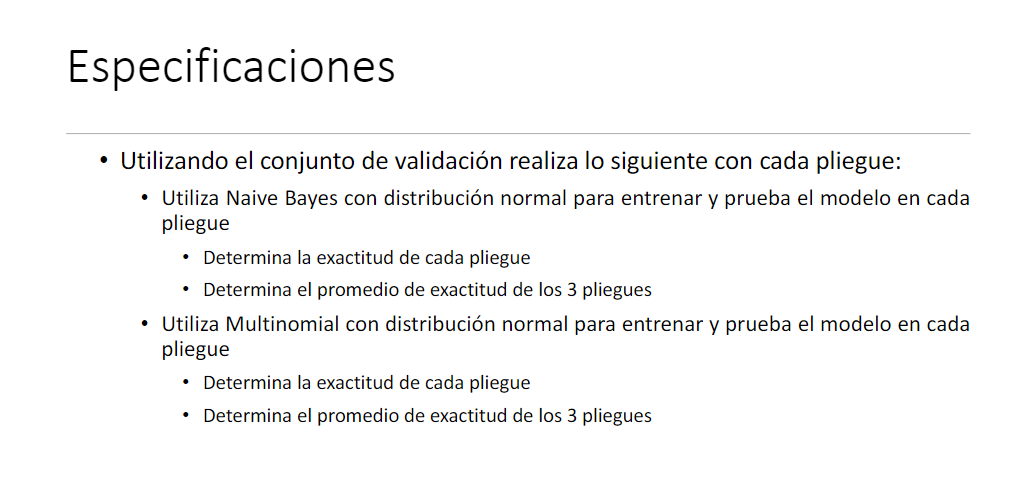

In [43]:
pd.options.display.max_colwidth = 200

#Email
DFEpliegues = pd.read_csv("C:/Users/Angel/OneDrive/Documents/AprendizajeMaquina/Data_Validation_Train_Email_Pliegues3.csv", sep=',', engine='python')
X_E = DFEpliegues.values
DFETargetpliegues = pd.read_csv("C:/Users/Angel/OneDrive/Documents/AprendizajeMaquina/target_Validation_Email_train3.csv", sep=',', engine='python')
Y_E = DFETargetpliegues.values
#iris

DFIpliegues = pd.read_csv("C:/Users/Angel/OneDrive/Documents/AprendizajeMaquina/Data_Validation_Train_iris_Pliegues3.csv", sep=',', engine='python')
X_I = DFIpliegues.values
DFITargetpliegues = pd.read_csv("C:/Users/Angel/OneDrive/Documents/AprendizajeMaquina/target_Validation_iris_train3.csv", sep=',', engine='python')
Y_I = DFITargetpliegues.values

#### Desarrollo de Bayes y multinomial

In [51]:
clf = GaussianNB()
clf.fit(X_test_i, y_test_i)

y_predict = clf.predict(X_test_i)
print ('------------Gaussian NB------------')
print (y_predict)
print (clf.predict_proba(X_test_i))
# ~ print (clf.predict_log_proba(X))

print (accuracy_score(y_test_i, y_predict))
print(classification_report(y_test_i, y_predict))
print (confusion_matrix(y_test_i, y_predict))

#X_test_E, y_test_E,X_test_i,y_test_i

------------Gaussian NB------------
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]



------------Multinomial NB------------
1.0
45
                precision    recall  f1-score   support

Iris-virginica       1.00      1.00      1.00        45

      accuracy                           1.00        45
     macro avg       1.00      1.00      1.00        45
  weighted avg       1.00      1.00      1.00        45

[[45]]


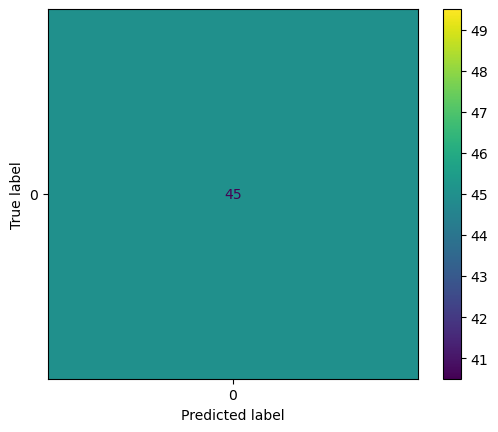

In [53]:
print ('\n------------Multinomial NB------------')
clf1 = MultinomialNB()
clf1.fit(X_test_i, y_test_i)

y_predict = clf1.predict(X_test_i)
print (accuracy_score(y_test_i, y_predict))
print (accuracy_score(y_test_i, y_predict, normalize=False))

print(classification_report(y_test_i, y_predict))
cm = confusion_matrix(y_test_i, y_predict)
print (cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#X_test_E, y_test_E,X_test_i,y_test_i

In [47]:
( 0.9506837961044343 + 0.9506837961044343 + 0.9614747307373653 )/3

0.9542807743154113